# Section 18: Boosting Methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

## Classification with AdaBoost

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot: xlabel='class', ylabel='count'>

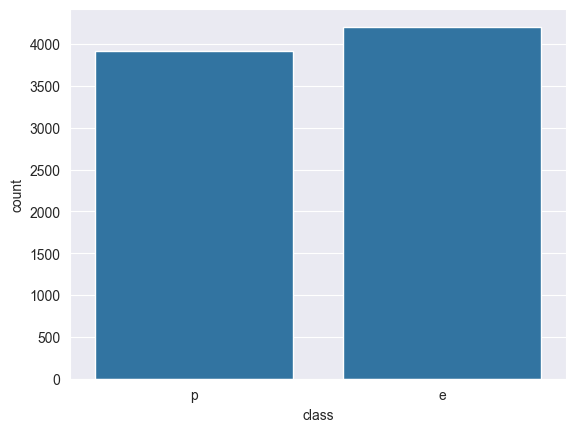

In [4]:
sns.countplot(df, x='class')

In [5]:
feat_uniq = df.describe().transpose().reset_index().sort_values('unique')

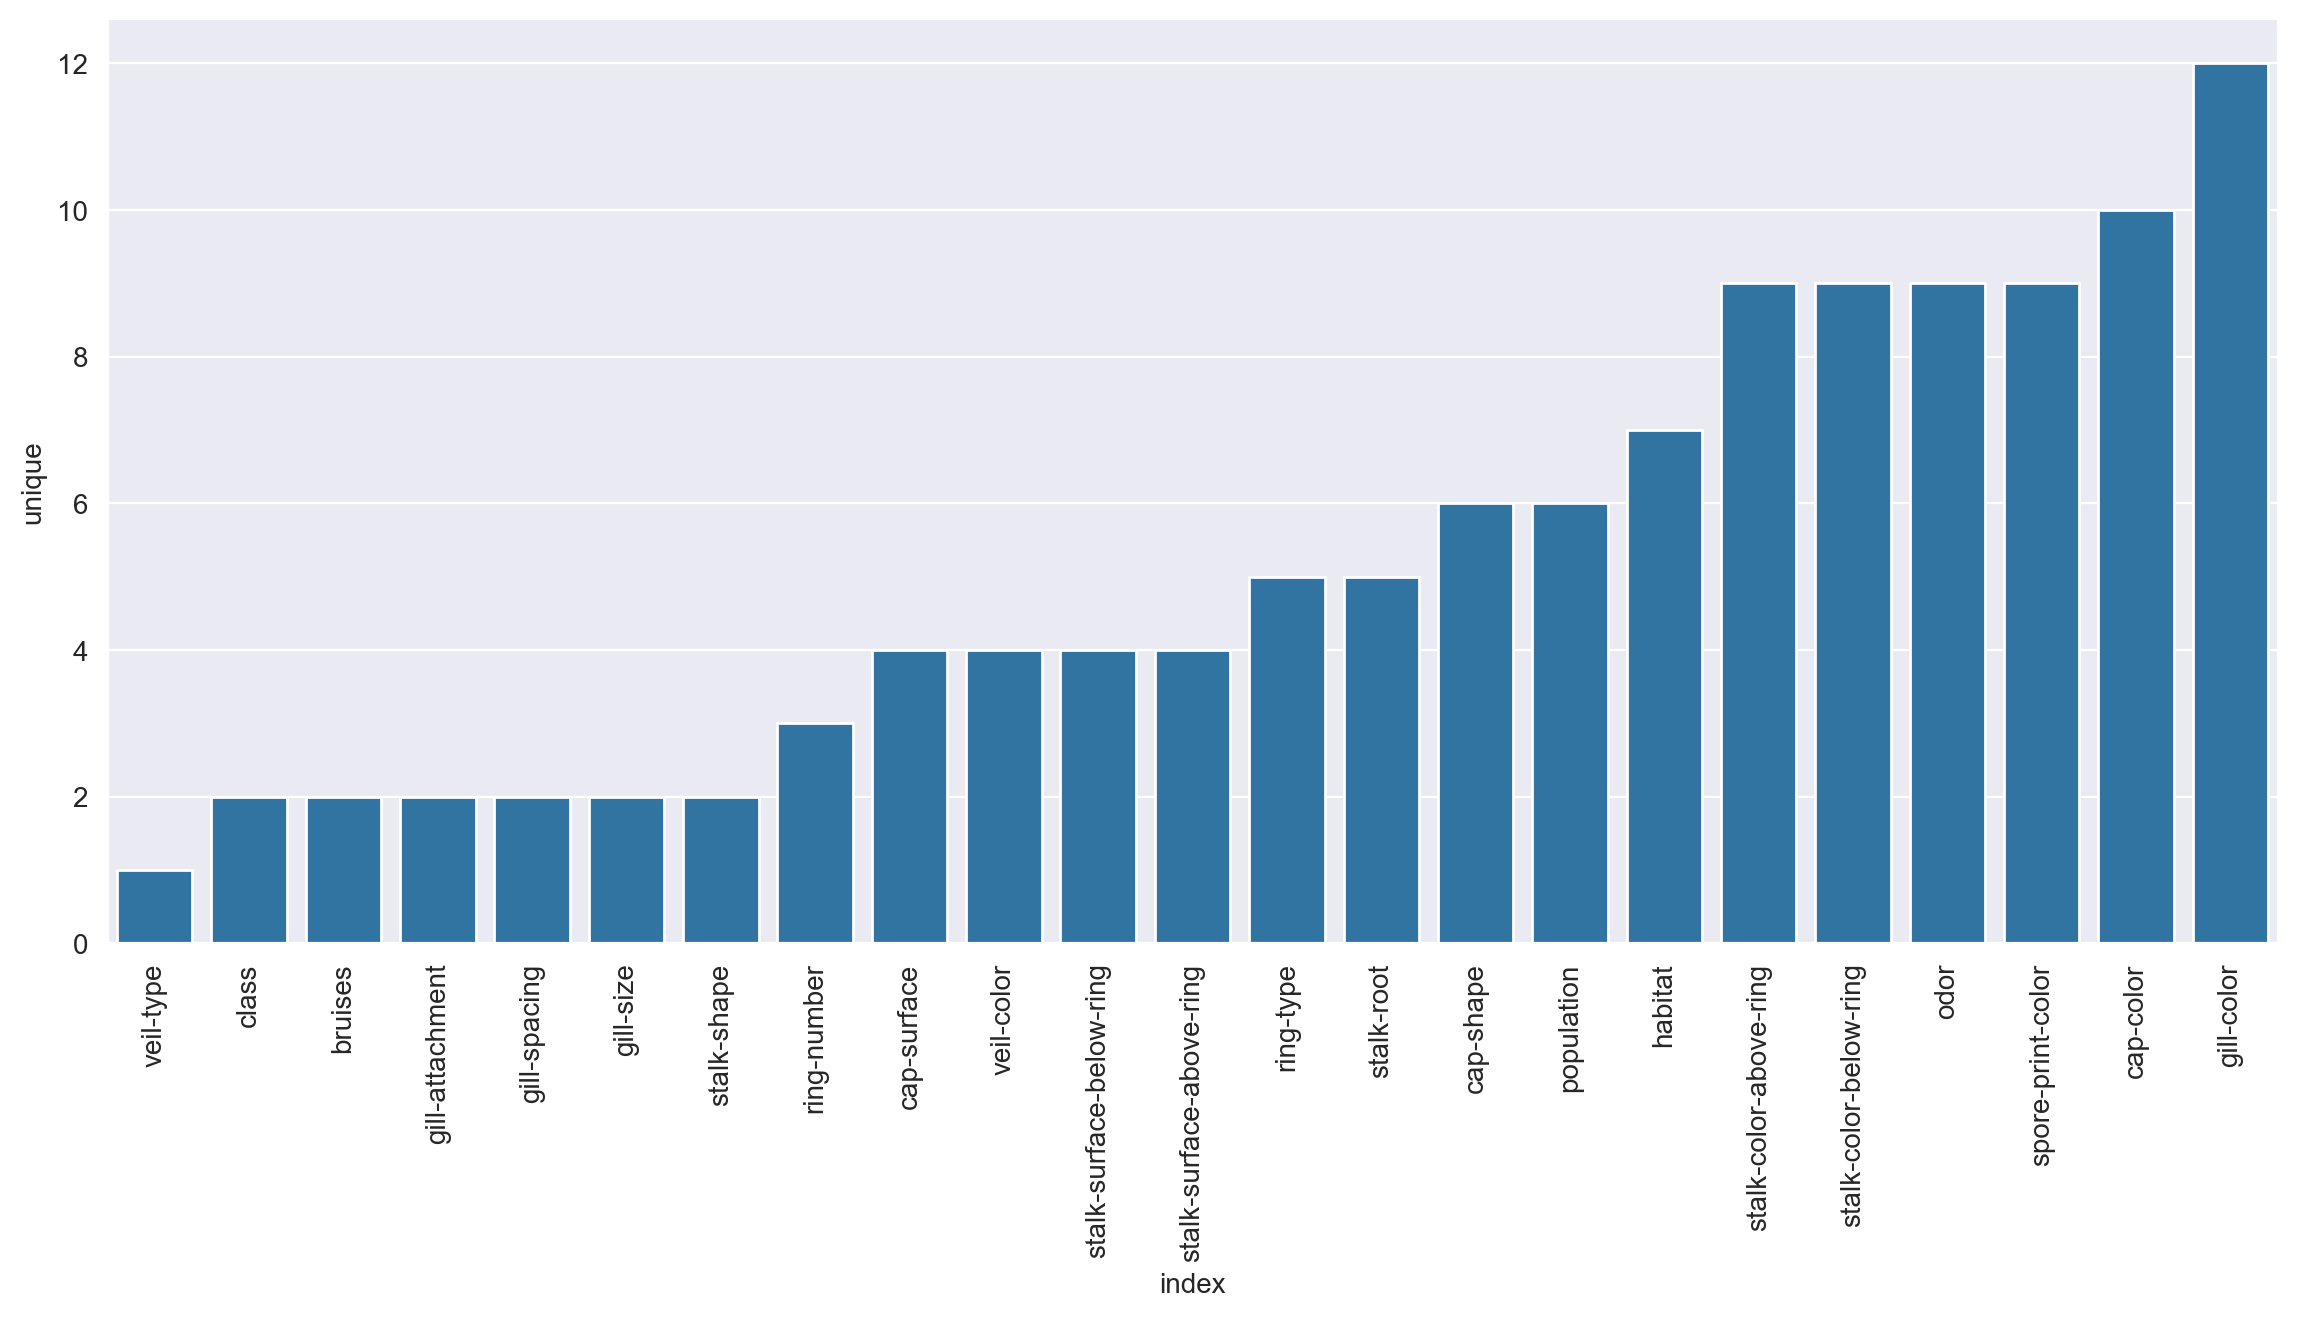

In [6]:
plt.figure(figsize=(14, 6), dpi=200)

sns.barplot(feat_uniq, x='index', y='unique')

plt.xticks(rotation=90);

In [7]:
X = df.drop('class', axis=1)

In [8]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [11]:
y = df['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [13]:
model = AdaBoostClassifier(n_estimators=1)

In [14]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [17]:
most_important_feature_index = model.feature_importances_.argmax()

In [18]:
X.columns[most_important_feature_index]

'odor_n'

<AxesSubplot: xlabel='odor', ylabel='count'>

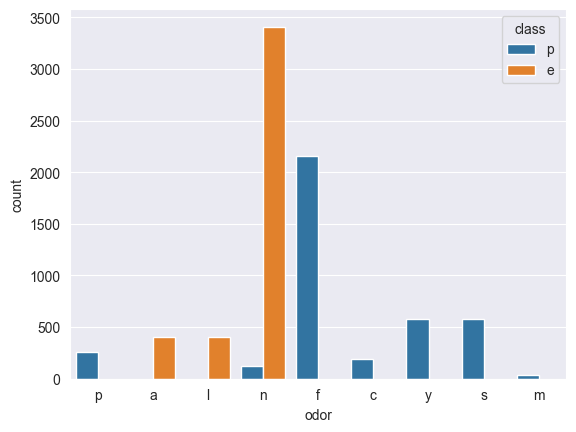

In [19]:
sns.countplot(df, x='odor', hue='class')

In [20]:
columns_nr = len(X.columns)

In [21]:
error_rates = []

for n in range(1, columns_nr + 1):
    model = AdaBoostClassifier(n_estimators=n)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    
    error_rates.append(err)

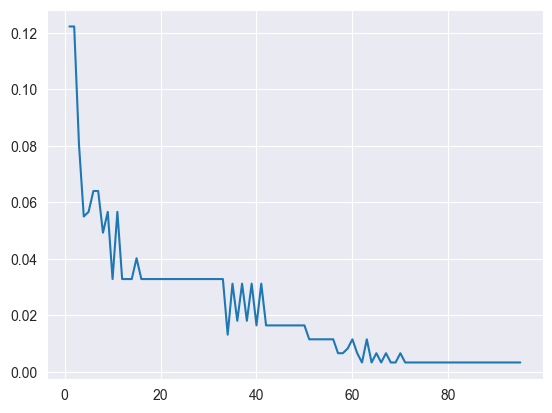

In [22]:
plt.plot(range(1, columns_nr + 1), error_rates)

In [23]:
features = pd.DataFrame(model.feature_importances_, X.columns, ['Importance'])

In [24]:
important_features = features[features['Importance'] > 0]

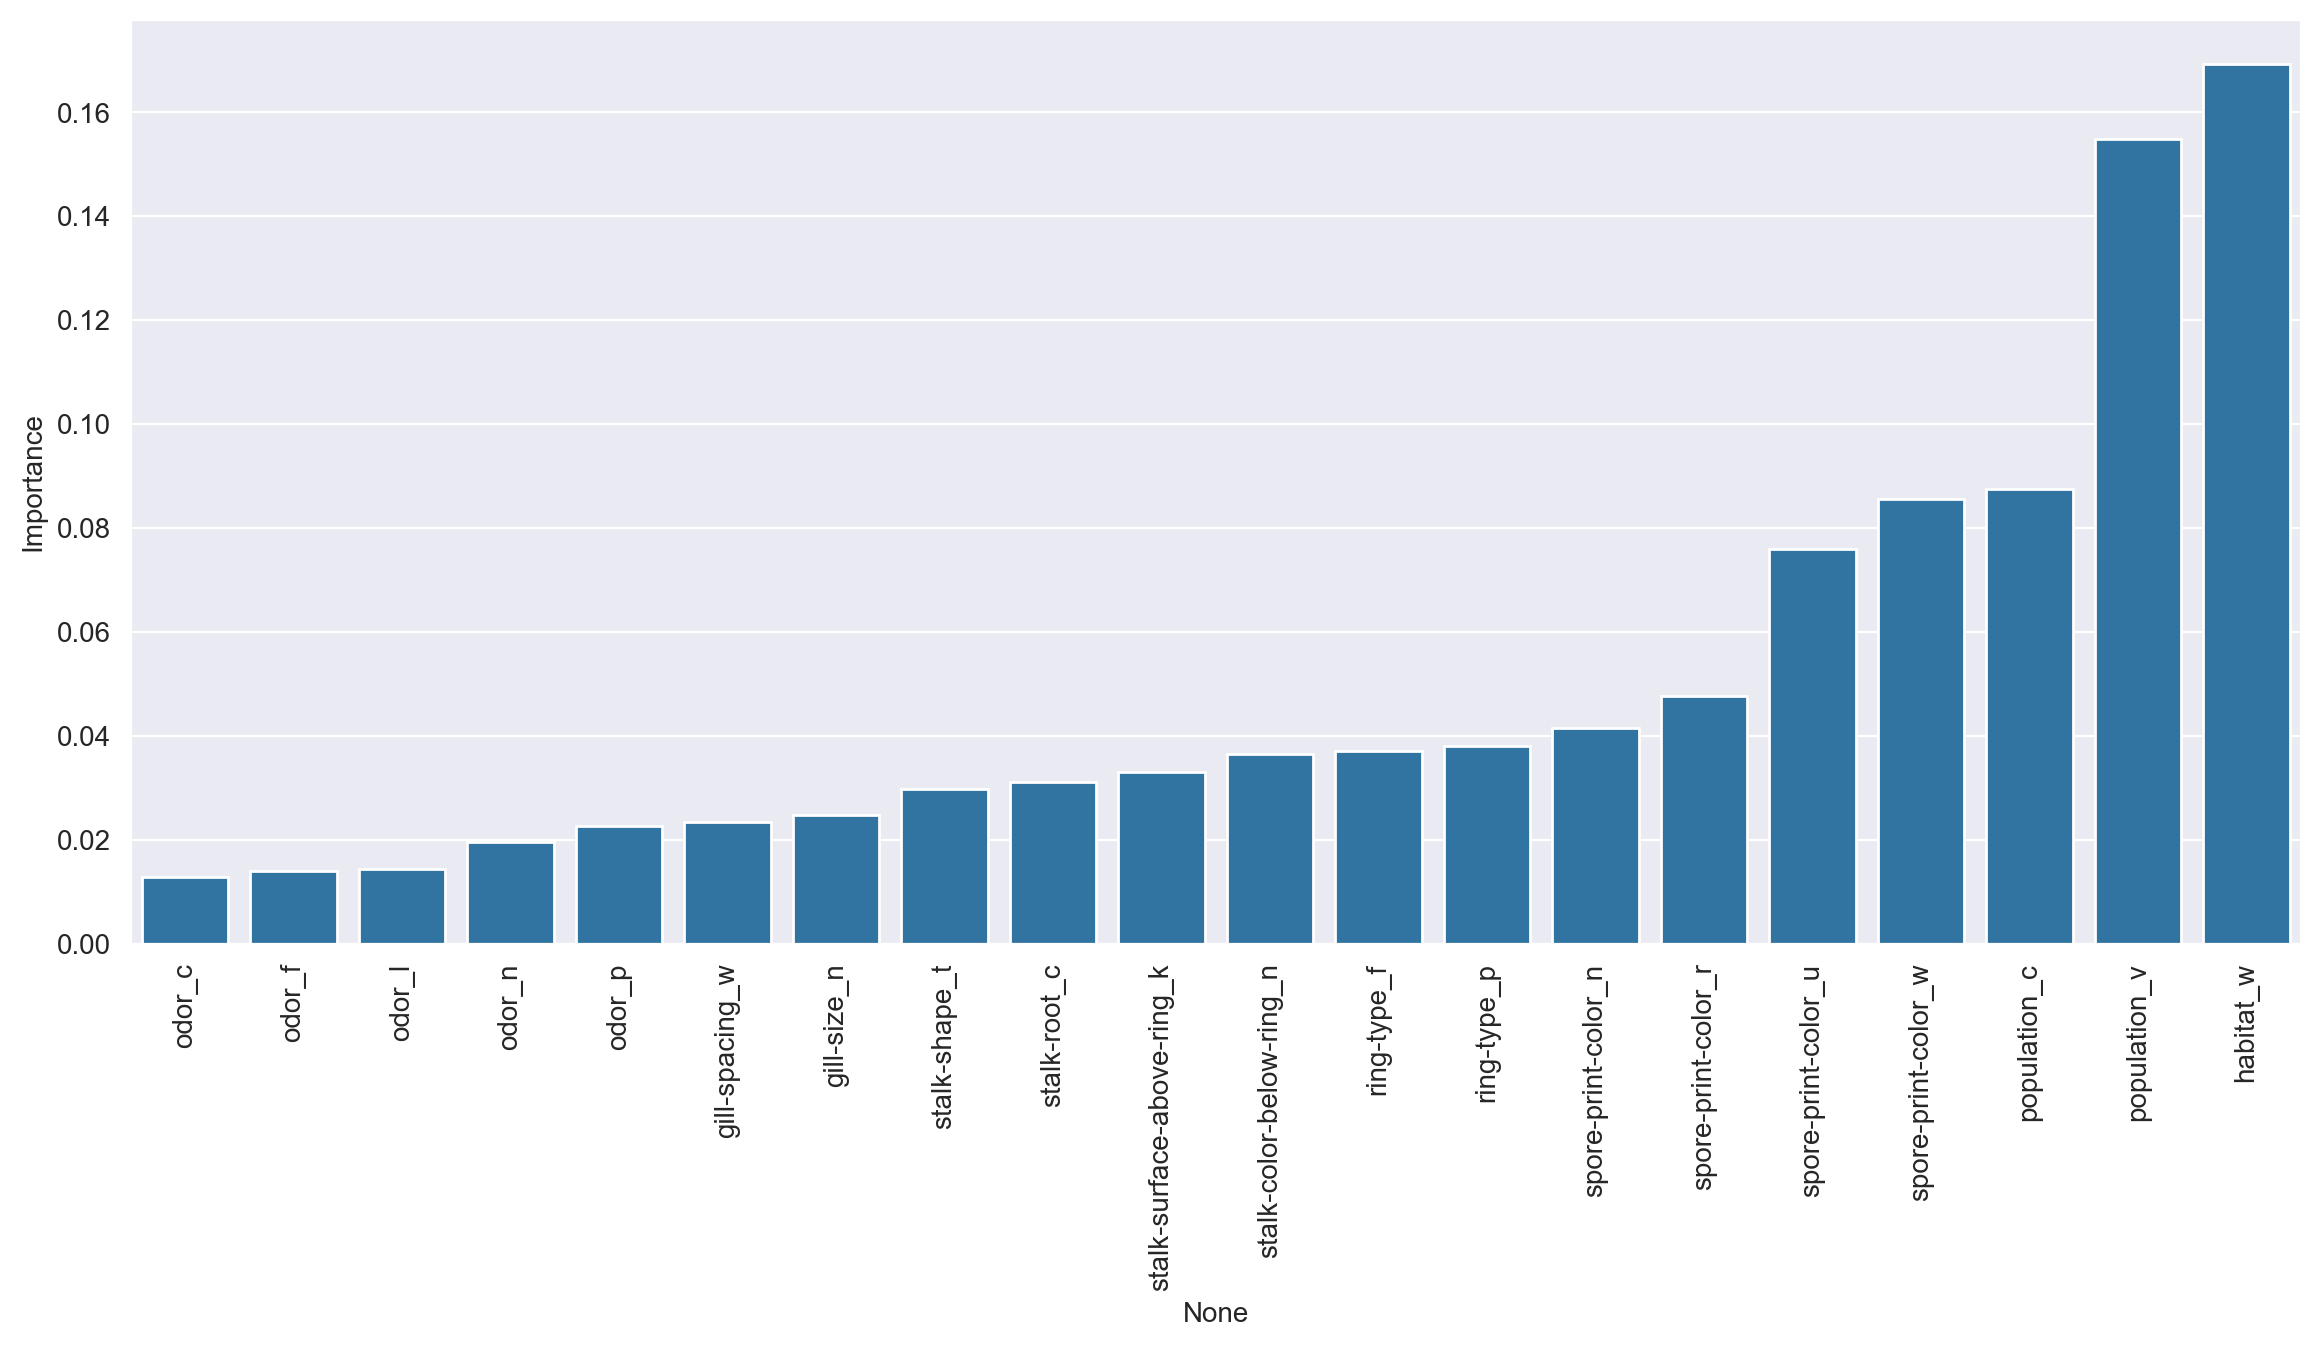

In [25]:
plt.figure(figsize=(14, 6), dpi=200)

sns.barplot(important_features.sort_values('Importance'), x=important_features.index, y='Importance')

plt.xticks(rotation=90);

## Classification with Gradient Boosting

In [26]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5]
}

In [27]:
gb_model = GradientBoostingClassifier()

In [28]:
grid = GridSearchCV(gb_model, param_grid)

In [29]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [30]:
y_pred = grid.predict(X_test)

In [31]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [33]:
feature_importances = grid.best_estimator_.feature_importances_

In [34]:
important_features = pd.DataFrame(feature_importances, X.columns, ['Importance'])

In [35]:
important_features = important_features[important_features['Importance'] > 0.0005]

In [36]:
important_features = important_features.sort_values('Importance')

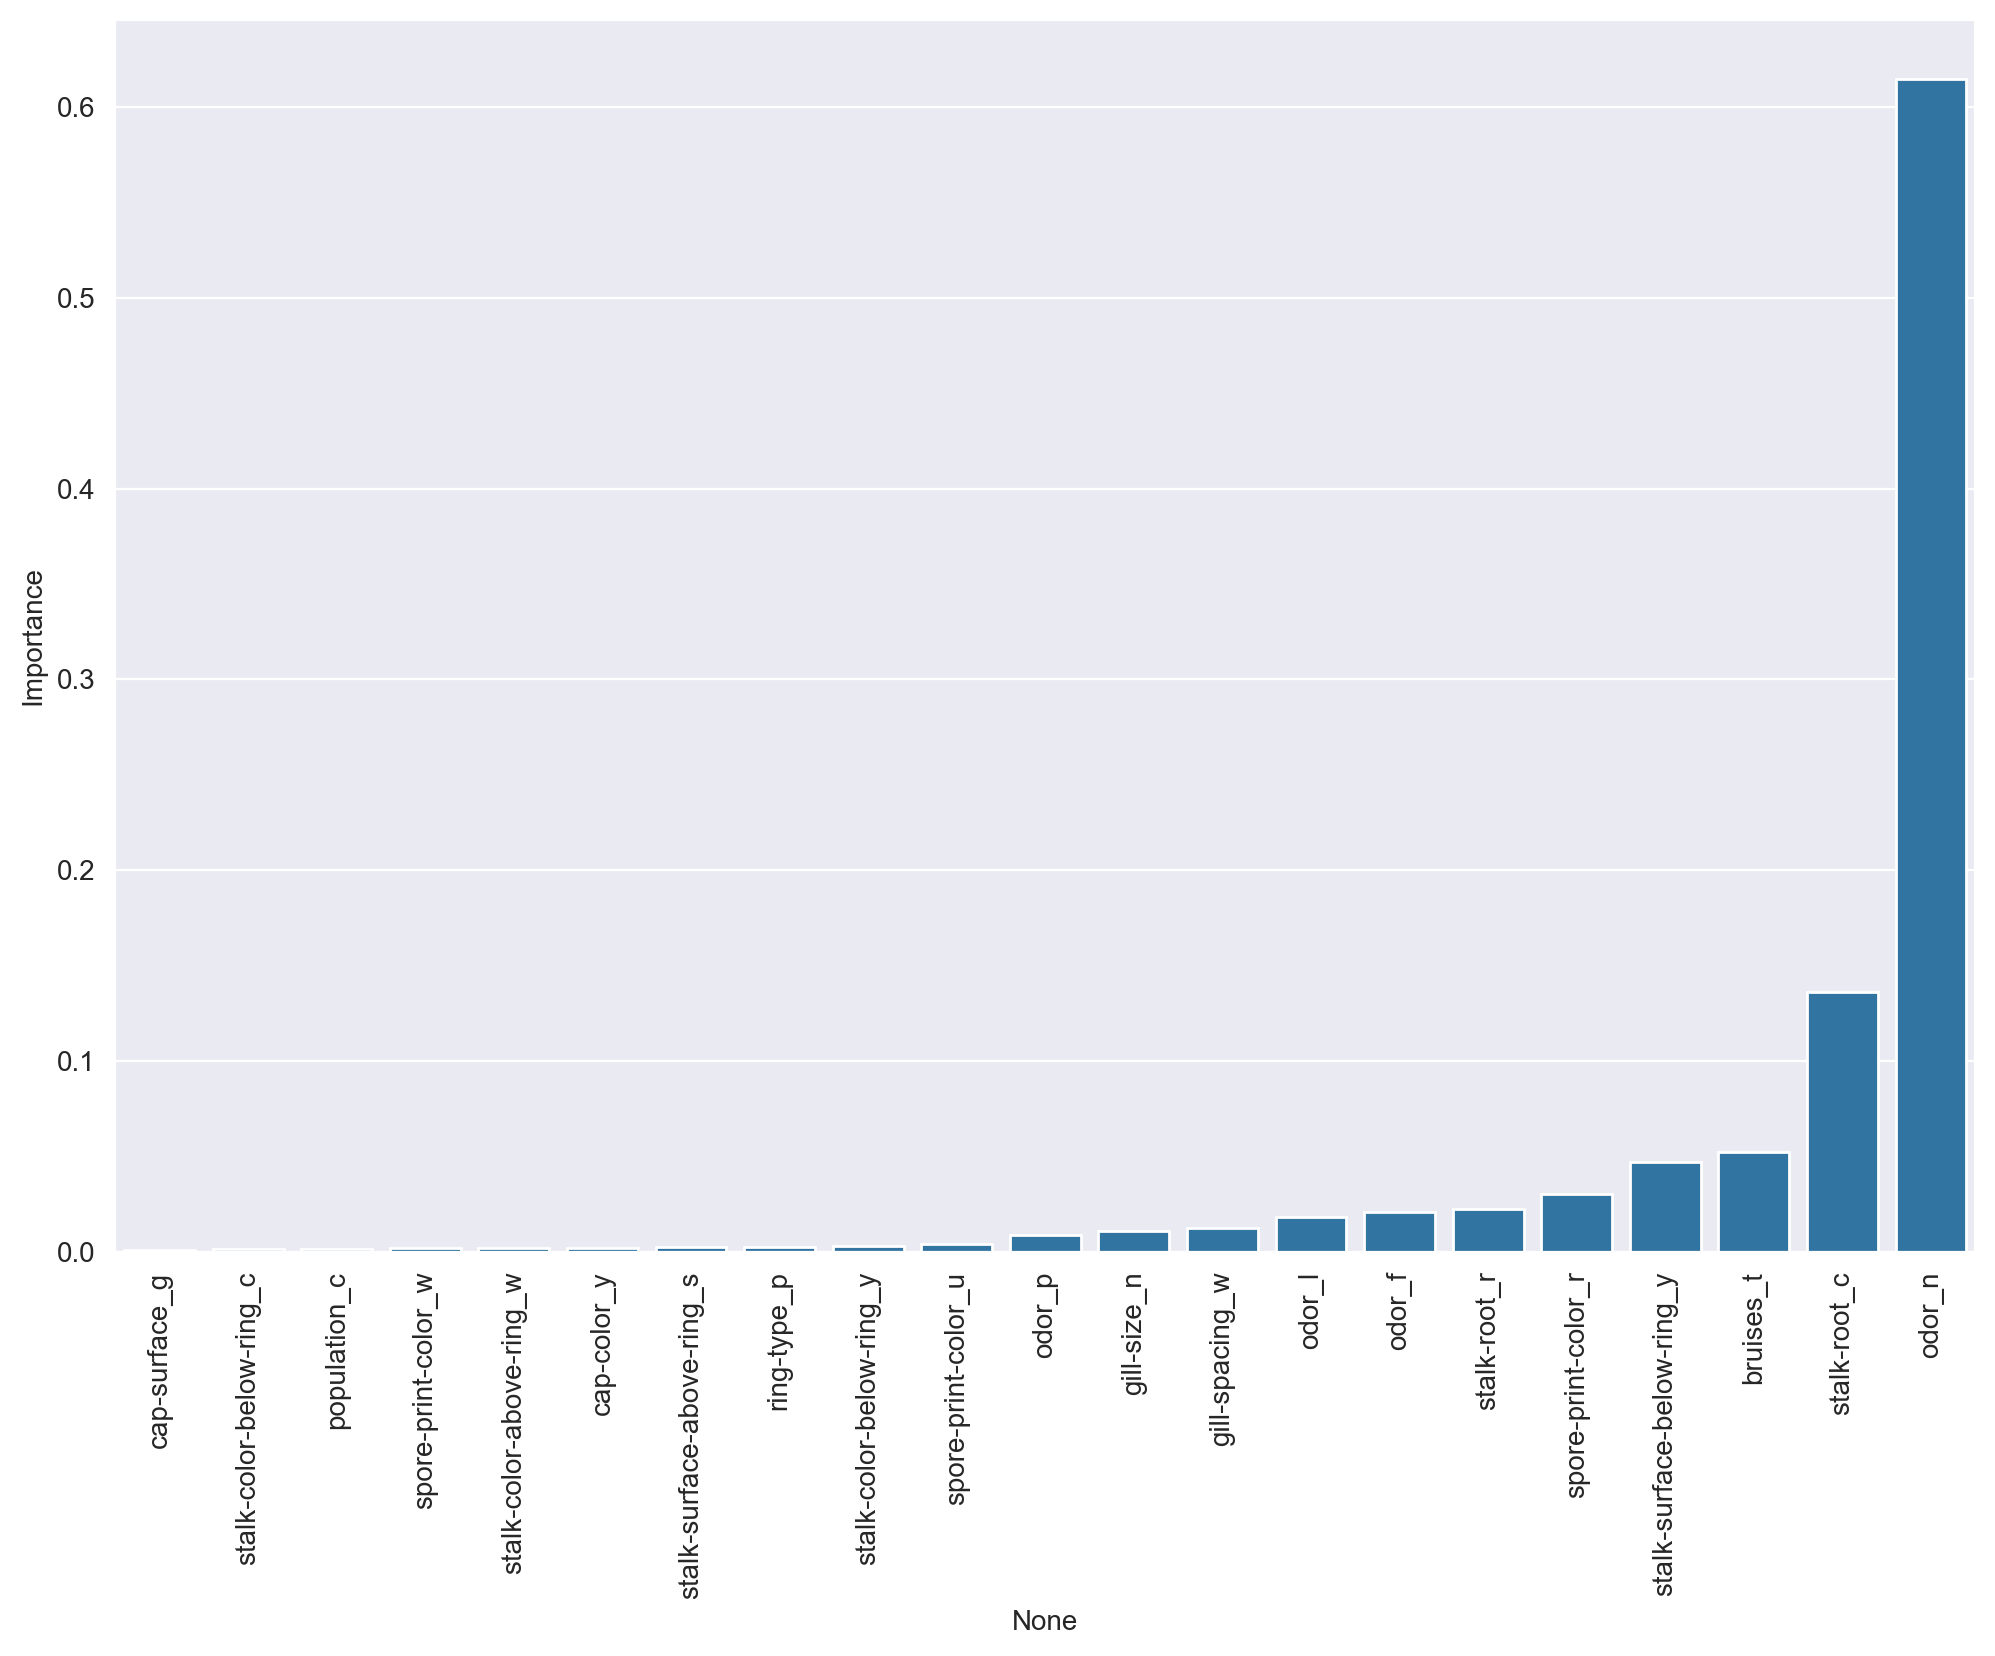

In [37]:
plt.figure(figsize=(12, 8), dpi=200)

sns.barplot(important_features, x=important_features.index, y='Importance')

plt.xticks(rotation=90);